<a href="https://colab.research.google.com/github/ShotaArima/simulation-of-free-fall/blob/main/Task02_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

# 鉛直投げ上げのシミュレーション
- 地球、月、火星、太陽の4天体における物体の鉛直投げ上げを行う
## 条件
- 高さは10m地点から落下を行う
- 空気抵抗はない
- すべて同じ質量の物体
## 変数
- $x$ : 時刻 $t$ における高さ
  - 地面0mを原点とし、鉛直方向に正の向きである
- $h$ : 初期位置の高さ(今回は10m)
- $v_0$ : 初速度
- $g$ : 重力加速度
  - 地球 : $9.78 \mathrm{m/s^2}$
  - 月 : $1.62 \mathrm{m/s^2}$
  - 火星 : $3.72 \mathrm{m/s^2}$
  - 太陽 : $2.74\times 10^2  \mathrm{m/s^2}$

## 導出
- 運動方程式から2回積分を行い、微分方程式によるシミュレーションを行う
$$
\begin{align}
ma = -mg \tag{1} \\
a = \cfrac{dv}{dt} = \cfrac{d^2x}{dt^2} \tag{2}
\end{align}
$$

- (1), (2)より、
$$
\cfrac{d^2x}{dt^2} = -g \tag{3}
$$

- (3)を $t$ で積分すると単位時間変化による速度変化を示す
  $$
  \cfrac{\partial x}{\partial t} = -gt + C_1 \tag{4}
  $$
  - (4)の $C_1$ は、積分定数を表す。初期値の場合、
  - $\cfrac{\partial x}{\partial t}(0) = -g\times 0 +v_0 =v_0$となるため、

  $$
  \cfrac{\partial x}{\partial t} = -gt + v_0 \tag{4'}
  $$

- (4')を $t$ で積分すると単位時間変化による位置変化を示す

  $$
  x(t) = -\frac{1}{2}gt^2+v_0t+C_2 \tag{5}
  $$
  
  - (5)の $C_2$ は、積分定数を表す。初期値の場合、
  - $x(0) = -\frac{1}{2}g\cdot0^2+v_0\cdot0+h \tag{5}$となるため、

  $$
  x(t) = -\frac{1}{2}gt^2+v_0t+h \tag{5'}
  $$



### Euler法での導出
- 微分を変化率と解釈し、連続的な運動を離散的に近似する
-

$$
\frac{dx}{dt} = u \\
\frac{du}{dt} = -g
$$

- (1)のEuler法
$$
x_{n+1} = x_n + \frac{dx}{dt} \cdot \Delta t = x_n + u_n \cdot \Delta t
$$

In [2]:
# 現在の高さと鉛直方向の速度からdt後の高さを求める関数
def next_x(x, v, dt):
  return x + v * dt


- (2)のEuler法
$$
u_{n+1} = u_n + \frac{du}{dt} \cdot \Delta t = u_n - g \cdot \Delta t
$$

In [3]:
# 現在の速度からdt後の高さxを求める関数(空気抵抗は無視)
def next_u(v, dt, g):
  return v - g * dt

In [4]:
# 自由落下のシミュレート関数
def solve_freefall(x0, v0, dt, tmax, g):
  x_list = []
  v_list = []
  t_list = []

  # 初期値の設定
  x = x0
  v = v0
  t = 0.0

  while (t < tmax):
    x_list.append(x)
    v_list.append(v)
    t_list.append(t)

    # 更新
    x = next_x(x, v, dt)
    v = next_u(v, dt, g)
    t = t + dt

  return x_list, v_list, t_list



## シミュレーション

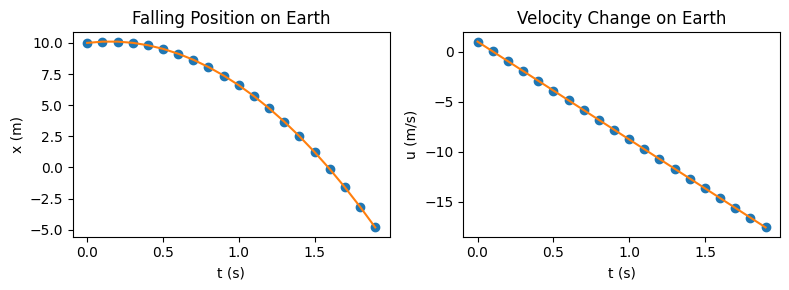

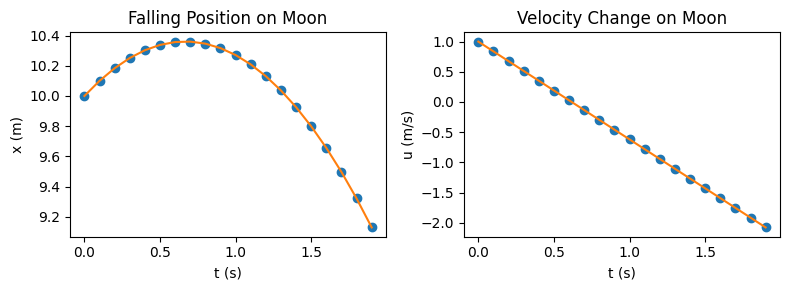

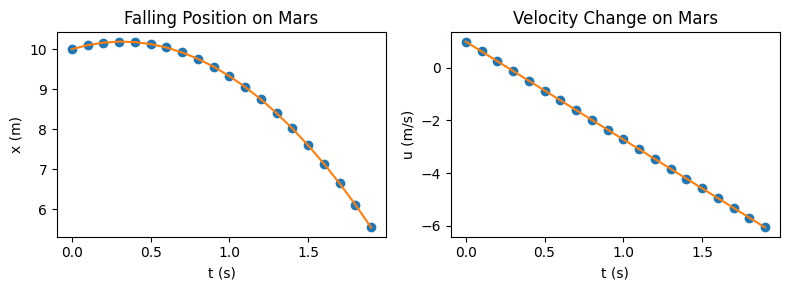

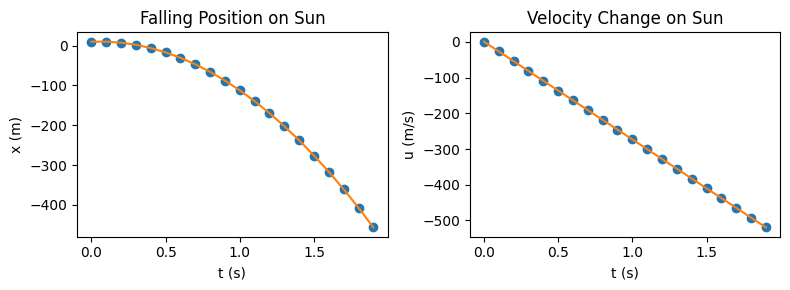

In [15]:
# 各天体の重力
gravity = {"Earth": 9.78,
           "Moon": 1.62,
           "Mars": 3.72,
           "Sun" : 2.74 *100
}

x_list = {}
v_list = {}
t_list = {}

# 数値解
for planet, g in gravity.items():
  x_list[planet], v_list[planet], t_list[planet] = solve_freefall(10.0, 1.0, 0.1, 2.0, g)

  plt.figure(figsize=(8,3))
  # t vs x のグラフ
  plt.subplot(1,2,1)
  plt.plot(t_list[planet], x_list[planet], 'o')
  plt.plot(t_list[planet], x_list[planet])
  plt.xlabel('t (s)')
  plt.ylabel('x (m)')
  # plt.title(f"{planet}における落下位置")
  plt.title(f"Falling Position on {planet}")

  # t vs u のグラフ
  plt.subplot(1,2,2)
  plt.plot(t_list[planet], v_list[planet], 'o')
  plt.plot(t_list[planet], v_list[planet])
  plt.xlabel('t (s)')
  plt.ylabel('u (m/s)')
  # plt.title(f"{planet}における速度変化")
  plt.title(f"Velocity Change on {planet}")
  # 2つのグラフを綺麗に配置する。
  plt.tight_layout()

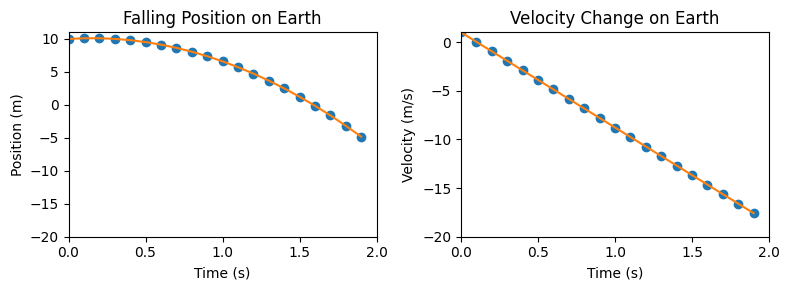

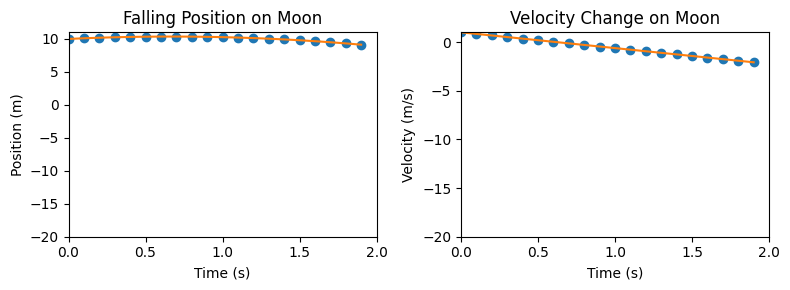

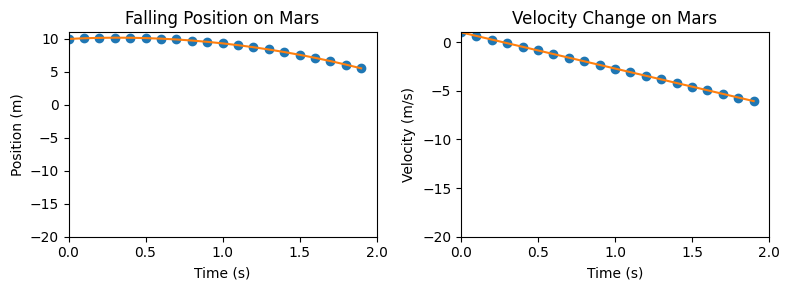

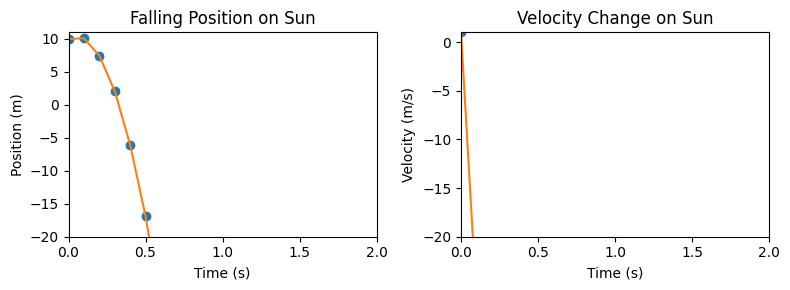

In [17]:
# 数値解用の辞書
x_list = {}
u_list = {}
t_list = {}

for planet, g in gravity.items():
    # 自由落下の数値解
    x_list[planet], u_list[planet], t_list[planet] = solve_freefall(10.0, 1.0, 0.1, 2.0, g)

    # グラフの描画
    plt.figure(figsize=(8, 3))

    # t vs x のグラフ（位置）
    plt.subplot(1, 2, 1)
    plt.plot(t_list[planet], x_list[planet], 'o')
    plt.plot(t_list[planet], x_list[planet])
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.title(f"Falling Position on {planet}")
    plt.xlim(0, 2.0)
    plt.ylim(-20, 11)

    # t vs u のグラフ（速度）
    plt.subplot(1, 2, 2)
    plt.plot(t_list[planet], u_list[planet], 'o')
    plt.plot(t_list[planet], u_list[planet])
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.title(f"Velocity Change on {planet}")
    plt.xlim(0, 2.0)
    plt.ylim(-20, 1)

    plt.tight_layout()
    plt.show()
